In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Задание 1. Загрузка данных**

Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

In [ ]:
column_names = ['surgery?', 'Age', 'Hospital Number', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 
                'peripheral pulse', 'mucous membranes', 'capillary refill time', 'pain', 'peristalsis', 'abdominal distension', 
                'nasogastric tube', 'nasogastric reflux', 'nasogastric reflux PH', 'rectal examination', 'abdomen', 'packed cell volume', 
                'total protein', 'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome', 'surgical lesion?', 'type of lesion', 
                'type of lesion2', 'type of lesion3', 'cp_data']

horse_data = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv', names = column_names, na_values = ['?'])

df = horse_data[['surgery?', 'Age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'pain', 'outcome']]
df.head()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    299 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB



**Задание 2. Первичное изучение данных**

Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

In [ ]:
# Моды (числа, наиболее часто встречающиеся в данной выборке):

print('surgery:', df['surgery?'].mode()[0])
print('Age:', df['Age'].mode()[0])
print('rectal temperature:', df['rectal temperature'].mode()[0])
print('pulse:', df['pulse'].mode()[0])
print('respiratory rate:', df['respiratory rate'].mode()[0])
print('temperature of extremities:', df['temperature of extremities'].mode()[0])
print('pain:', df['pain'].mode()[0])
print('outcome:', df['outcome'].mode()[0])

surgery: 1.0
Age: 1
rectal temperature: 38.0
pulse: 48.0
respiratory rate: 20.0
temperature of extremities: 3.0
pain: 3.0
outcome: 1.0


In [ ]:
# Медиана или второй квартиль (50% величин выборки больше этого числа, остальные 50% - меньше):
# также можно найти в методе describe() в строке "50 %":

print('surgery:', df['surgery?'].median())
print('Age:', df['Age'].quantile())
print('rectal temperature:', df['rectal temperature'].quantile())
print('pulse:', df['pulse'].quantile())
print('respiratory rate:', df['respiratory rate'].quantile())
print('temperature of extremities:', df['temperature of extremities'].quantile())
print('pain:', df['pain'].median())
print('outcome:', df['outcome'].quantile())

surgery: 1.0
Age: 1.0
rectal temperature: 38.2
pulse: 64.0
respiratory rate: 24.5
temperature of extremities: 3.0
pain: 3.0
outcome: 1.0


In [ ]:
df.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.640000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,2.173972,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,9.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


In [ ]:
df.var() # дисперсия

surgery?                        0.240399
Age                             4.726154
rectal temperature              0.536247
pulse                         819.708775
respiratory rate              311.248328
temperature of extremities      1.092137
pain                            1.710706
outcome                         0.543445
dtype: float64

На основе полученных базовых статистик (**СКО и дисперсия**) можно сделать вывод о том, что в столбцах "**pulse**" и "**respiratory rate**" имеется очень большой разброс данных. Таким образом, значения этих двух столбцов сильно расходятся со средним значением.

In [ ]:
""" данные по проведению операций: (1 - была операция, 2 - лечение было без операции)
"""
# данные корректны с точки зрения заполнения

df['surgery?'].value_counts()

1.0    180
2.0    119
Name: surgery?, dtype: int64

In [ ]:
"""
Из описания к данным следует, что в столбце возраста лошади числа 9 не должно быть.
Поэтому это опечатка / ошибка. 
Отсюда и повышенная дисперсия получилась.
Должно быть 1 (взрослая лошадь) или 2 (молодая, менее 6 месяцев).
"""
# данные НЕкорректны
# сделаем позже замену 9 на 2, иначе зачем тогда было вводить столбец возраста?

print(df['Age'].value_counts())
print('\nДисперсия:', df['Age'].var())
print('СКО:','     ', df['Age'].std())

1    276
9     24
Name: Age, dtype: int64

Дисперсия: 4.726153846153814
СКО:       2.1739719055576163


In [ ]:
# ректальная температура в градусах Цельсия (нормальная температура 37,8):
# горячие конечности должны коррелировать с повышенной ректальной температурой

df['rectal temperature'].unique()

array([38.5, 39.2, 38.3, 39.1, 37.3,  nan, 37.9, 38.1, 37.2, 38. , 38.2,
       37.6, 37.5, 39.4, 39.9, 38.4, 38.6, 37.8, 37.7, 39. , 35.4, 38.9,
       37.4, 40.3, 37. , 39.7, 38.7, 36.4, 38.8, 39.6, 36.8, 39.5, 36.5,
       36. , 37.1, 39.3, 36.1, 36.6, 40.8, 36.9, 40. ])

In [ ]:
"""
30-40 ударов в минуту нормально для взрослых;
пульс может быть 20-25 ударов в минуту;
может быть учащенное сердцебиение
"""

# В этом столбце из-за сильной дисперсии найдем выбросы, основанные на межквартильном размахе 
df['pulse'].unique()

array([ 66.,  88.,  40., 164., 104.,  nan,  48.,  60.,  80.,  90.,  72.,
        42.,  92.,  76.,  96., 128.,  64., 110., 130., 108., 100., 112.,
        52., 146., 150., 120., 140.,  84.,  46., 114., 160.,  54.,  56.,
        38.,  98.,  50.,  44.,  70.,  78.,  49.,  30., 136., 132.,  65.,
        86., 129.,  68.,  36.,  45., 124., 184.,  75.,  82.])

In [ ]:
len(df[df['pulse'].isna() == True]) # - число пропусков в столбце "pulse"

24

In [ ]:
# далее убираем пропуски для расчета выбросов в столбце "pulse" (иначе НЕКОРРЕКТНО):

q1_pulse  = df[df['pulse'].isna() == False]['pulse'].quantile(0.25)
q3_pulse  = df[df['pulse'].isna() == False]['pulse'].quantile(0.75)
iqr_pulse = q3_pulse - q1_pulse                   # межквартильный размах

lower_bound_pulse  = q1_pulse - (1.5 * iqr_pulse) # нижняя граница диапазона
higher_bound_pulse = q3_pulse + (1.5 * iqr_pulse) # верхняя граница диапазона

# теперь выводим сами выбросы (БЕЗ пропусков в текущем столбце) - все значения пульса, которые не попадает в наш диапазон:
df[df['pulse'].isna() == False][~df[df['pulse'].isna() == False]['pulse'].between(lower_bound_pulse, higher_bound_pulse, inclusive = True)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  # This is added back by InteractiveShellApp.init_path()


,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
41,2.0,9,39.0,150.0,72.0,NaN,NaN,1.0
55,1.0,9,38.6,160.0,20.0,3.0,3.0,2.0
255,1.0,9,38.8,184.0,84.0,1.0,4.0,2.0
275,1.0,9,38.8,150.0,50.0,1.0,5.0,2.0


In [ ]:
# Создаем теперь новый dataframe без выбросов в столбце "pulse":
df_p = df[df['pulse'].isna() == False][df[df['pulse'].isna() == False]['pulse'].between(lower_bound_pulse, higher_bound_pulse, inclusive = True)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


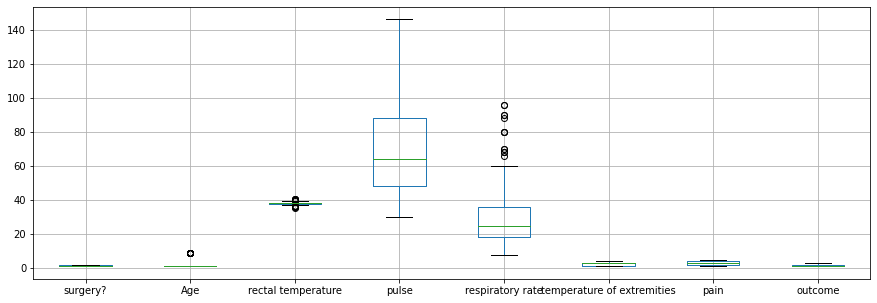

In [ ]:
plt.figure(figsize=(15,5))
df_p.boxplot()

In [ ]:
# теперь сравним показатели до (df) и после (df_p) исключения выбросов в столбце "pulse":
print('pulse_mode:', df['pulse'].mode()[0])
print('pulse_mode_:', df_p['pulse'].mode()[0])
print('pulse_median:', df['pulse'].median())
print('pulse_median_:', df_p['pulse'].median())
print('pulse_mean:', df['pulse'].mean())
print('pulse_mean_:', df_p['pulse'].mean())
print('pulse_std:', df['pulse'].std())
print('pulse_std_:', df_p['pulse'].std())
print('pulse_max:', df['pulse'].max())
print('pulse_max_:', df_p['pulse'].max())
print('pulse_min:', df['pulse'].min())
print('pulse_min_:', df_p['pulse'].min())

pulse_mode: 48.0
pulse_mode_: 48.0
pulse_median: 64.0
pulse_median_: 64.0
pulse_mean: 71.91304347826087
pulse_mean_: 70.25830258302582
pulse_std: 28.630556660735003
pulse_std_: 26.082484460392624
pulse_max: 184.0
pulse_max_: 146.0
pulse_min: 30.0
pulse_min_: 30.0


In [ ]:
"""
нормальная скорость частоты дыхания от 8 до 10
в описании утверждается, что полезность сомнительна из-за больших колебаний
"""
# найдем все выбросы на межквартильном размахе

df['respiratory rate'].unique()

array([28., 20., 24., 84., 35., nan, 16., 36., 12., 52., 48., 21., 60.,
       34., 42., 30., 96., 72., 15., 44., 32., 22., 18., 80., 40., 10.,
       51., 68., 66.,  9., 14., 90.,  8., 23., 58., 13., 70., 26., 88.,
       25., 50.])

In [ ]:
len(df[df['respiratory rate'].isna() == True]) # - количество пропусков в столбце

58

In [ ]:
# сначала исключаем пропуски в столбце "respiratory rate" для дальнейшего расчета выбросов:
df_ = df[df['respiratory rate'].isna() == False] 

q1_resprate  = df_['respiratory rate'].quantile(0.25)
q3_resprate  = df_['respiratory rate'].quantile(0.75)
iqr_resprate = q3_resprate - q1_resprate                   # межквартильный размах

lower_bound_resprate  = q1_resprate - (1.5 * iqr_resprate) # нижняя граница диапазона
higher_bound_resprate = q3_resprate + (1.5 * iqr_resprate) # верхняя граница диапазона

# выводим сами выбросы - все значения, которые не попадает в наш диапазон:
df_[~df_['respiratory rate'].between(lower_bound_resprate, higher_bound_resprate, inclusive = True)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  if sys.path[0] == '':


,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
39,1.0,9,39.2,146.0,96.0,NaN,NaN,2.0
41,2.0,9,39.0,150.0,72.0,NaN,NaN,1.0
82,1.0,9,38.1,100.0,80.0,3.0,3.0,1.0
84,1.0,1,37.8,60.0,80.0,1.0,2.0,1.0
103,1.0,9,38.0,140.0,68.0,1.0,3.0,1.0
106,1.0,1,38.3,52.0,96.0,NaN,NaN,1.0
120,1.0,1,39.4,54.0,66.0,1.0,2.0,1.0
125,1.0,1,38.0,42.0,68.0,4.0,3.0,1.0
186,1.0,1,39.3,64.0,90.0,2.0,NaN,1.0


In [ ]:
# Создаем теперь новый dataframe без выбросов в столбце "respiratory rate":
df_new = df_[df_['respiratory rate'].between(lower_bound_resprate, higher_bound_resprate, inclusive = True)]

# далее сравним показатели до (df) и после (df_new) исключения выбросов в столбце "respiratory rate":
print('resprate_mode:', df['respiratory rate'].mode()[0])
print('resprate_mode_:', df_new['respiratory rate'].mode()[0])
print('resprate_median:', df['respiratory rate'].median())
print('resprate_median_:', df_new['respiratory rate'].median())
print('resprate_mean:', df['respiratory rate'].mean())
print('resprate_mean_:', df_new['respiratory rate'].mean())
print('resprate_std:', df['respiratory rate'].std())
print('resprate_std_:', df_new['respiratory rate'].std())
print('resprate_max:', df['respiratory rate'].max())
print('resprate_max_:', df_new['respiratory rate'].max())
print('resprate_min:', df['respiratory rate'].min())
print('resprate_min_:', df_new['respiratory rate'].min())

resprate_mode: 20.0
resprate_mode_: 20.0
resprate_median: 24.5
resprate_median_: 24.0
resprate_mean: 30.417355371900825
resprate_mean_: 26.715555555555557
resprate_std: 17.642231385134664
resprate_std_: 11.46146407446094
resprate_max: 96.0
resprate_max_: 60.0
resprate_min: 8.0
resprate_min_: 8.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  


In [ ]:
"""
возможные значения температуры конечностей:
    1 = нормальный
    2 = теплый
    3 = прохладный
    4 = холодный
прохладные или холодные конечности указывают на возможный шок
горячие конечности должны коррелировать с повышенной ректальной температурой
"""
# данные корректны с точки зрения заполнения

df['temperature of extremities'].unique()

array([ 3., nan,  1.,  4.,  2.])

In [ ]:
"""
боль, возможные значения:
    1 = тревога, боли нет
    2 = депрессия
    3 = перемежающаяся легкая боль
    4 = перемежающаяся сильная боль
    5 = постоянная сильная боль

- НЕ следует рассматривать как упорядоченную или дискретную переменную
- чем больнее, тем больше вероятность, что потребуется операция
"""
# данные корректны с точки зрения заполнения

df['pain'].unique()

array([ 5.,  3.,  2., nan,  4.,  1.])

In [ ]:
"""
что в итоге случилось с лошадью?
- возможные значения:
    1 = жива
    2 = умерла
    3 = была усыплена
"""
# данные корректны с точки зрения заполнения

df['outcome'].unique()

array([ 2.,  3.,  1., nan])

**Задание 3. Работа с пропусками**

* Рассчитать количество пропусков для всех выбранных столбцов. 
* Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. 
* Сформировать датафрейм, в котором пропуски будут отсутствовать.




In [ ]:
df_copy = df.copy() # сначала сделаем копию исходных данных

In [ ]:
# количество пропусков в каждом столбце (ноль соответствует отсутствию пропусков):
df_copy.isna().sum()

surgery?                       1
Age                            0
rectal temperature            60
pulse                         24
respiratory rate              58
temperature of extremities    56
pain                          55
outcome                        1
dtype: int64

In [ ]:
# сделаем сперва замену некорректного возраста лошади, т.к. в выборке вообще не было молодых лошадей

df_copy.loc[df_copy['Age'] == 9, 'Age'] = int(2)
df_copy['Age'].unique()

array([1, 2])

In [ ]:
#  данные по проведению операций: (1 - была операция, 2 - лечение было без операции)
df_copy[df_copy['surgery?'].isna()]


,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
132,NaN,1,38.0,48.0,20.0,3.0,4.0,NaN


In [ ]:
"""
Мои рассуждения на основе анализа имеющихся данных для этой одной лошади:
1. пульс повышенный, а он наблюдается у животных с болезненными поражениями или страдающих от циркуляторного шока
2. частота дыхания повышенная
3. температура конечностей равная 3 указывает на возможный шок
4. перемежающаяся сильная боль равна 4, что нам говорит о большей вероятности, что потребуется хирургическое вмешательство для лечения
Поэтому считаю, что surgery? должно быть равно 1
"""
df_copy['surgery?'] = df['surgery?'].fillna(1)

# проверка после заполнения:
df_copy['surgery?'].isna().unique()

array([False])

In [ ]:
# видим, что в столбце "outcome" также присутствует единственный пропуск, как и в "surgery? для этой же лошади"
df_copy[df_copy['outcome'].isna()]

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
132,1.0,1,38.0,48.0,20.0,3.0,4.0,NaN


In [ ]:
df['outcome'].mode()[0]

1.0

In [ ]:
# однозначного ответа, что в итоге случилось с этой лошадью мы не знаем
# однако этот столбец категориальный, поэтому можно воспользоваться заменой модой

df_copy['outcome'] = df_copy['outcome'].fillna(df['outcome'].mode()[0])
df_copy.loc[132:132]

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
132,1.0,1,38.0,48.0,20.0,3.0,4.0,1.0


In [ ]:
df_copy.isna().sum()

surgery?                       0
Age                            0
rectal temperature            60
pulse                         24
respiratory rate              58
temperature of extremities    56
pain                          55
outcome                        0
dtype: int64

In [ ]:
# столбец "pain" связан со столбцом "surgery?" и столбцом "outcome", которые оба категориальны (т.е. замена модой)!
# т.к. при сильной боли высокая вероятность требования проведения операции и как следствие исход операции в 'outcome'

df_copy['pain'].fillna(df_copy.groupby(['surgery?', 'outcome'])['pain'].transform(lambda x: x.mode()[0]), inplace = True)
df_copy.isna().sum()

surgery?                       0
Age                            0
rectal temperature            60
pulse                         24
respiratory rate              58
temperature of extremities    56
pain                           0
outcome                        0
dtype: int64

In [ ]:
df_copy.groupby('pain')['temperature of extremities'].median()

pain
1.0    2.0
2.0    3.0
3.0    2.0
4.0    3.0
5.0    3.0
Name: temperature of extremities, dtype: float64

In [ ]:
# температура конечностей "temperature of extremities" зависит от столбца "pain", поэтому:

df_copy['temperature of extremities'].fillna(df_copy.groupby('pain')['temperature of extremities'].transform('median'), inplace = True)
df_copy.isna().sum()

surgery?                       0
Age                            0
rectal temperature            60
pulse                         24
respiratory rate              58
temperature of extremities     0
pain                           0
outcome                        0
dtype: int64

In [ ]:
"""
"respiratory rate": полезность сомнительна из-за больших колебаний, - как следует из описания
однако из интернет-ресурсов следует, что частота дыхания может достигать до 120 в минуту, т.е. выбросы не удаляем из рассмотрения
"""
df_copy.groupby(['surgery?', 'pain'])['respiratory rate'].median()

surgery?  pain
1.0       1.0     16.0
          2.0     36.0
          3.0     22.0
          4.0     30.0
          5.0     29.0
2.0       1.0     20.0
          2.0     20.0
          3.0     25.0
          4.0     24.0
          5.0     29.0
Name: respiratory rate, dtype: float64

In [ ]:
df_copy['respiratory rate'].fillna(df_copy.groupby(['surgery?', 'pain'])['respiratory rate'].transform(lambda x: x.mode()[0]), inplace = True)
df_copy.isna().sum()

surgery?                       0
Age                            0
rectal temperature            60
pulse                         24
respiratory rate               0
temperature of extremities     0
pain                           0
outcome                        0
dtype: int64

In [ ]:
"""
После умеренных упражнений частота пульса лошади может в принципе увеличиться до 180-240 уд/мин. Поэтому выбросы не удаляем.
Согласно описанию, у животных с болезненными поражениями (столбец "pain") может быть учащенное сердцебиение.
"""
df_copy.groupby(['surgery?', 'pain'])['pulse'].transform(lambda x : x.mode()[0]) 
# при сильных болях (pain = 5.0) частота пульса выше, что согласуется с описанием к данным

0       96.0
1       48.0
2       60.0
3       40.0
4       96.0
       ...  
295     40.0
296    100.0
297     52.0
298     48.0
299     40.0
Name: pulse, Length: 300, dtype: float64

In [ ]:
df_copy['pulse'].fillna(df_copy.groupby(['surgery?', 'pain'])['pulse'].transform(lambda x : x.mode()[0]), inplace = True)
df_copy.isna().sum()

surgery?                       0
Age                            0
rectal temperature            60
pulse                          0
respiratory rate               0
temperature of extremities     0
pain                           0
outcome                        0
dtype: int64

In [ ]:
"""
Ректальная температура ("rectal temperature") может быть снижена, когда животное находится в позднем шоке ("pain" = 4.0 и 5.0)
"""
df_copy.groupby('pain')['rectal temperature'].median() # видим, что температура ниже при максимальном уровне боли, согласуется с описанием выше

pain
1.0    38.20
2.0    38.30
3.0    38.20
4.0    38.05
5.0    38.00
Name: rectal temperature, dtype: float64

In [ ]:
df_copy['rectal temperature'].fillna(df_copy.groupby('pain')['rectal temperature'].transform('median'), inplace = True)
df_copy.isna().sum() # таким образом, все пропуски заполнены!

surgery?                      0
Age                           0
rectal temperature            0
pulse                         0
respiratory rate              0
temperature of extremities    0
pain                          0
outcome                       0
dtype: int64

In [ ]:
df_copy.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000
mean,1.396667,1.080000,38.157167,70.760000,28.816667,2.383333,2.93000,1.550000
std,0.490023,0.271746,0.657188,28.011507,16.531405,0.969289,1.33079,0.736642
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.900000,48.000000,18.000000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.100000,60.000000,24.000000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


In [ ]:
df_copy

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,2.0,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,3.0,5.0,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,38.3,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0
